In [8]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [113]:
#lbj : 265
#durant : 153
#antetokounmpo : 20
#jokic : 279
# Irving: 261
# doncic : 144
# embiid: 159
# leaonard : 314 
 

In [3]:
#function to get stats of desired players
def get_stats():
    #nba players i want info off
    nba_players = {265:'Lebron James',153:'Kevin Durant',20:'Giannis Antetokounmpo',279:'Nikola Jokic',261:'Kyrie Irving',
144:'Luka Doncic',159:'Joel Embiid',314:'Kawhi Leonard'}
    #list that will contain dataframe
    lst = []
    #for loop that creates a dataframe and stores it in the lst list
    for x in nba_players:
        url = "https://api-nba-v1.p.rapidapi.com/statistics/players/playerId/"+str(x)

        headers = {
            'x-rapidapi-host': "api-nba-v1.p.rapidapi.com",
            'x-rapidapi-key': "38930cb347msh0647b50209ab3bfp1bd38djsnfdc6e7ea537d"
            }
        response = requests.request("GET", url, headers=headers)
        content = json.loads(response.content)
        df = pd.DataFrame(content['api']['statistics'])
        lst.append(df)
        df['name'] = nba_players[x]
    return pd.concat([*lst], ignore_index=True)

In [4]:
#stores the results in a dataframe
df = get_stats()

SyntaxError: invalid syntax (1519794600.py, line 3)

In [6]:
#dataframe with lbj stats
df_lbj = df[df['name']=='Lebron James']

In [9]:
df_lbj['game_nb'] = df_lbj.index +1

/var/folders/3v/qs19pl4s4bl0h4lwglmmm9d80000gn/T/ipykernel_63204/2170124997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lbj['game_nb'] = df_lbj.index +1


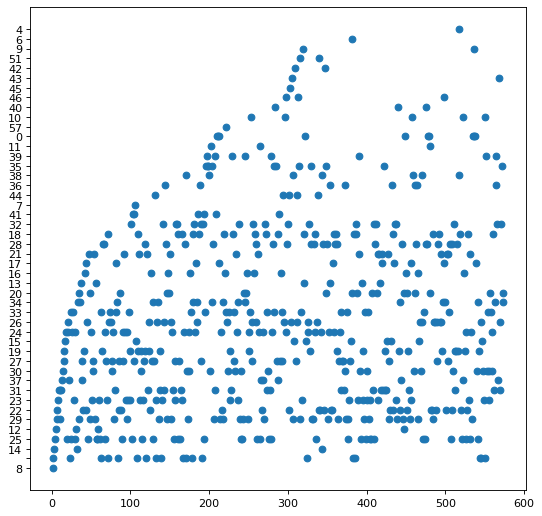

In [20]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x=df_lbj['game_nb'],y=df_lbj['points']);

In [16]:
import plotly.express as px
fig = px.scatter(x=df_lbj['game_nb'],y=df_lbj['points'])
fig.show()

In [24]:
import plotly.express as px
fig = px.histogram(x=df_lbj['points'])
fig.show()

In [27]:
import plotly.express as px
fig = px.scatter(x=df['points'],color = df['name'])
fig.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gameId     3504 non-null   object
 1   teamId     3504 non-null   object
 2   points     3504 non-null   object
 3   pos        3504 non-null   object
 4   min        3504 non-null   object
 5   fgm        3504 non-null   object
 6   fga        3504 non-null   object
 7   fgp        3504 non-null   object
 8   ftm        3504 non-null   object
 9   fta        3504 non-null   object
 10  ftp        3504 non-null   object
 11  tpm        3504 non-null   object
 12  tpa        3504 non-null   object
 13  tpp        3504 non-null   object
 14  offReb     3504 non-null   object
 15  defReb     3504 non-null   object
 16  totReb     3504 non-null   object
 17  assists    3504 non-null   object
 18  pFouls     3504 non-null   object
 19  steals     3504 non-null   object
 20  turnovers  3504 non-null   obj

In [68]:

"""def get_stats():
    url = "https://free-nba.p.rapidapi.com/players"
    nb = 1
    total = []
    while nb <= 38:
        headers = {
        'x-rapidapi-host': "free-nba.p.rapidapi.com",
        'x-rapidapi-key': "38930cb347msh0647b50209ab3bfp1bd38djsnfdc6e7ea537d"
        }
        querystring = {"page":str(nb),"per_page":"100"}
        response = requests.request("GET", url, headers=headers, params=querystring)
        content = json.loads(response.content)
        df = pd.DataFrame(content['data'])
        team = df['team'].to_list()
        df2 = pd.DataFrame(team)
        df2.rename(columns={'id':'team_id'},inplace=True)
        df = df.drop('team',axis=1)
        df3 = pd.concat([df,df2],join='outer',axis=1)
        total.append(df3)
        nb+=1

    return pd.concat([*total], ignore_index=True)
"""


In [ ]:
# find better api -->more stats